# Customer Segmentation - K Means Clustering

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# load data
df = pd.read_excel(r"E:\MLIoT\ML\dataset\Wholesale customers data.xlsx")
df.shape

(440, 8)

In [13]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [14]:
#check for missing values
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [15]:
# check for duplicate entries
df.duplicated().sum()

0

In [16]:
# check for outliers
df.skew()

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64

In [17]:
df2 = df[['Fresh','Milk']]

### Outlier treatment

In [20]:
# capping with nearest value
df2['Fresh'][df2.Fresh>df2.Fresh.quantile(0.95)] = df2.Fresh.quantile(0.93)
df2['Milk'][df2.Milk>df2.Milk.quantile(0.94)] = df2.Milk.quantile(0.92)

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [21]:
df2.skew()

Fresh    0.885830
Milk     0.918551
dtype: float64

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2)

### K Means Clustering

In [27]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3,random_state=5)
model.fit(df3)

KMeans(n_clusters=3, random_state=5)

In [29]:
cent = sc.inverse_transform(model.cluster_centers_)
pd.DataFrame(cent,columns=df2.columns)

,Fresh,Milk
0,6521.457399,2547.735426
1,24470.889310,4534.913103
2,5559.564356,10512.328713


In [ ]:
# o cluster - moderate spenders on Fresh but lowest spenders on Milk
# 1 cluster - heavy spenders on Fresh, but moderate spenders on Milk
# 2 cluster - lowest spenders on Fresh, but heavy spenders on milk

C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


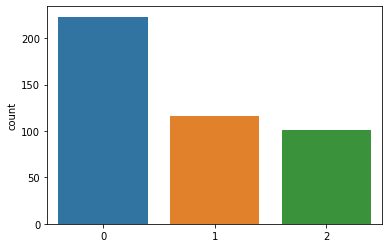

In [33]:
sns.countplot(model.labels_)
plt.show()

In [30]:
df2['cluster'] = model.labels_
df2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Fresh,Milk,cluster
0,12669.0,9656.0,2
1,7057.0,9810.0,2
2,6353.0,8808.0,2
3,13265.0,1196.0,0
4,22615.0,5410.0,1
5,9413.0,8259.0,2
6,12126.0,3199.0,0
7,7579.0,4956.0,0
8,5963.0,3648.0,0
9,6006.0,11093.0,2


C:\Users\anshu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


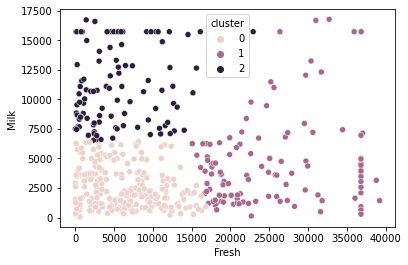

In [32]:
sns.scatterplot(df.Fresh,df.Milk,hue=df2.cluster)
plt.show()

## Elbow Method

In [34]:
k = []
inertia = []

for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=5)
    model.fit(df3)
    k.append(i)
    inertia.append(model.inertia_)

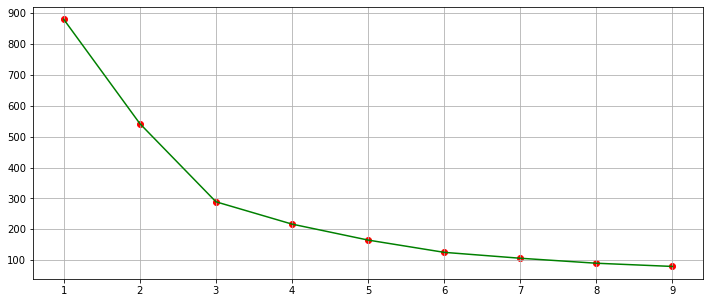

In [35]:
plt.figure(figsize=(12,5))
plt.scatter(k,inertia,c='r')
plt.plot(k,inertia,c='g')
plt.grid(True)
plt.show()